In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from random import shuffle
from scipy.special import gammaln
from scipy.special import logsumexp
from math import log
from math import pi

In [9]:
from igmm import IGMM, NIG

In [10]:
sns.set_context('paper')

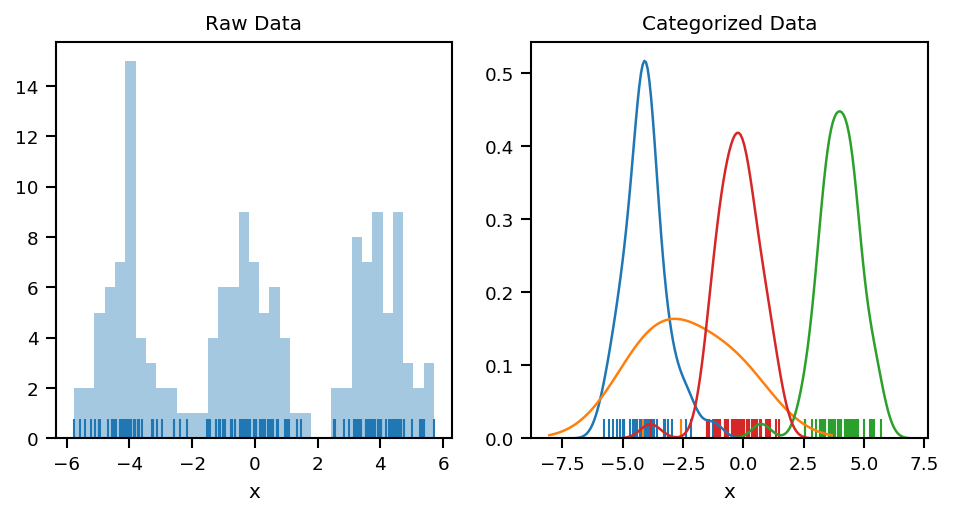

In [11]:
n = 50
std = .75
x = np.append(np.random.randn(n)*std,
              (np.random.randn(n)*std+4., np.random.randn(n)*std-4.,))

igmm = IGMM(x, .5, NIG, (0., 1., 1., 1.,), seqinit=True)

plt.figure(figsize=(7.5, 3.5), dpi=150)

igmm.infer(100)
z = igmm.z
k = igmm.k

df = pd.DataFrame([{'x': xi, 'j': j} for j, xi in zip(z, x)])

plt.clf()
plt.subplot(1, 2, 1)
sns.distplot(df['x'], bins=35, hist=True, rug=True, kde=False)
plt.title('Raw Data')

plt.subplot(1, 2, 2)
for j in range(k):
    xj = df['x'][df['j'] == j]
    if len(xj) == 1:
        continue
    sns.distplot(xj, hist=False, rug=True, kde=True, norm_hist=False)
plt.title('Categorized Data')
plt.show()